# 📚 Predicting Student Grades in Secondary Education (High School) using Machine Learning.

In this project, we're going to build a machine learning model with a goal of predicting the grades of student in secondary education(High school).

##  Problem definition

> How well can we predict the grades of student in secondary education, given its demographic, social and school related features which was collected by using school reports and questionnaires?

##  Data

> This data is downloaded from UCI Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/Student+Performance 

> It is also available in Kaggle : https://www.kaggle.com/dipam7/student-grade-prediction

> The dataset are provided regarding the performance in Mathematics (mat) subjects. In [Cortez and Silva, 2008], the dataset were modeled under binary/five-level classification and regression tasks.

##  Evaluation

> If we can reach 90% accuracy at predicting the student grades during the proof of concept, we'll pursue the project.

##  Features

> **Attribute Information:**

>* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
>* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
>* 3 age - student's age (numeric: from 15 to 22)
>* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
>* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
>* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
>* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
>* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
>* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
>* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
>* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
>* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
>* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
>* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
>* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
>* 16 schoolsup - extra educational support (binary: yes or no)
>* 17 famsup - family educational support (binary: yes or no)
>* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
>* 19 activities - extra-curricular activities (binary: yes or no)
>* 20 nursery - attended nursery school (binary: yes or no)
>* 21 higher - wants to take higher education (binary: yes or no)
>* 22 internet - Internet access at home (binary: yes or no)
>* 23 romantic - with a romantic relationship (binary: yes or no)
>* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
>* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
>* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
>* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
>* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
>* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
>* 30 absences - number of school absences (numeric: from 0 to 93)

>**These grades are related with the course subject:**
>* 31 G1 - first period grade (numeric: from 0 to 20)
>* 31 G2 - second period grade (numeric: from 0 to 20)
>* 32 G3 - final grade (numeric: from 0 to 20, output target)

>**Important note**: The target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades





In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [36]:
df = pd.read_csv('student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
df_math.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Data Exploration (exploratory data analysis or EDA)

In [12]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**School and Grades**

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(df['G1'],df['G2'])
ax1.set_title('G1 and G2')
ax2.scatter(df['G1'],df['G3'])
ax2.set_title('G1 and G3')
ax3.scatter(df['G2'],df['G3'])
ax3.set_title('G2 and G3')
plt.show()

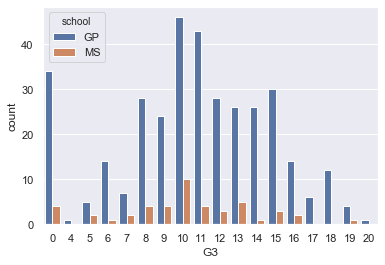

In [14]:
sns.countplot(df['G3'],hue=df['school']);

In [16]:
df.groupby('school')['G3'].mean()

school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64

**Sex and Grades**

In [17]:
df.groupby('sex')['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

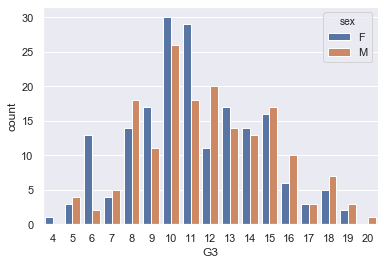

In [49]:
sns.countplot(df['G3'],hue=df['sex']);

**Dealing with outliers**

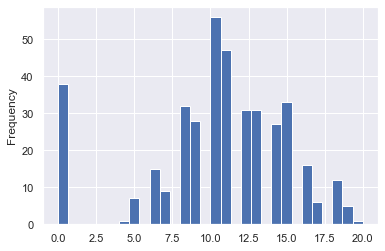

In [20]:
df['G3'].plot.hist(bins=30);

In [3]:
len(df[df['G3'] == 0])

38

In [37]:
outliers = df[df['G3'] == 0].index
df.drop(outliers, inplace=True)

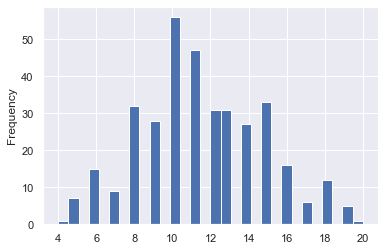

In [43]:
df['G3'].plot.hist(bins=30);

**Family size and Grade**

In [51]:
df['famsize'].value_counts()

GT3    250
LE3    107
Name: famsize, dtype: int64

In [57]:
df.groupby('famsize')['G3'].mean()

famsize
GT3    11.440000
LE3    11.719626
Name: G3, dtype: float64

**school, absences and Grades**

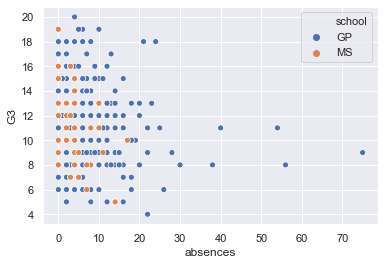

In [71]:
sns.scatterplot(df['absences'], df['G3'],hue=df['school']);

**sex, absences and Grades** 

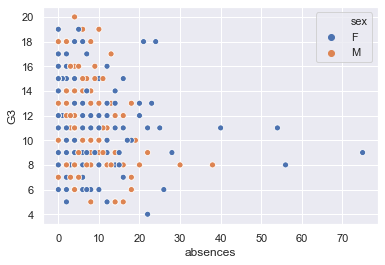

In [70]:
sns.scatterplot(df['absences'], df['G3'],hue=df['sex']);

**Correlation between G1 & G2, G1 & G3, G2 & G3**

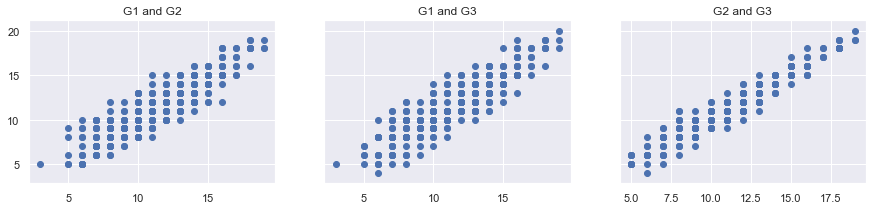

In [47]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(df['G1'],df['G2'])
ax1.set_title('G1 and G2')
ax2.scatter(df['G1'],df['G3'])
ax2.set_title('G1 and G3')
ax3.scatter(df['G2'],df['G3'])
ax3.set_title('G2 and G3')
plt.show()

## Convert string to categories and then turn into numbers

In [102]:
# Find the column which contain strings and convert into categorical values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()
    # and then turn categories into numbers
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      357 non-null    int8 
 1   sex         357 non-null    int8 
 2   age         357 non-null    int64
 3   address     357 non-null    int8 
 4   famsize     357 non-null    int8 
 5   Pstatus     357 non-null    int8 
 6   Medu        357 non-null    int64
 7   Fedu        357 non-null    int64
 8   Mjob        357 non-null    int8 
 9   Fjob        357 non-null    int8 
 10  reason      357 non-null    int8 
 11  guardian    357 non-null    int8 
 12  traveltime  357 non-null    int64
 13  studytime   357 non-null    int64
 14  failures    357 non-null    int64
 15  schoolsup   357 non-null    int8 
 16  famsup      357 non-null    int8 
 17  paid        357 non-null    int8 
 18  activities  357 non-null    int8 
 19  nursery     357 non-null    int8 
 20  higher      357 non-null    int8

## Modelling

We've done enough EDA (we could always do more) but lets start modelling our data

In [83]:
# importing a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split data into X & y
X = df.drop('G3', axis=1)
y = df['G3']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# instantiate a model
model = LinearRegression()

# fitting data
model.fit(X_train, y_train)

# check the accuracy
model.score(X_test, y_test)


0.9181151684931615

In [103]:
# Create a summary dataframe
y_preds = model.predict(X_test)
df_summary = pd.DataFrame(np.round(y_preds), columns=['Prediction']) 
df_summary['Target'] = np.array(y_test)

df_summary['Prediction'] = df_summary['Prediction'].astype(int)
df_summary['Residual'] = df_summary['Target'] - df_summary['Prediction']
df_summary['Difference%'] = np.absolute(df_summary['Residual']/df_summary['Target']*100)

pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_summary

,Prediction,Target,Residual,Difference%
0,12,12,0,0.00
1,18,18,0,0.00
2,11,11,0,0.00
3,9,9,0,0.00
4,16,15,-1,6.67
5,7,9,2,22.22
6,14,14,0,0.00
7,15,15,0,0.00
8,9,9,0,0.00
9,7,8,1,12.50
